<a href="https://colab.research.google.com/github/AnaBelenCarbajal/Thesis/blob/main/Dataset_Human_Category_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset novel shapes**

1) Installing packages

In [161]:
#packages
import os
import pandas as pd
import torch
import numpy as np
from matplotlib import pyplot as plt

from random import choice, randint, seed
import torchvision.transforms.functional as transform
from torch.utils.data import Dataset
from torchvision.io import read_image, ImageReadMode
from torchvision.transforms import v2
from torch.utils.data import DataLoader

from PIL import Image

In [ ]:
rng = np.random.default_rng(42)

In [ ]:
rng.integers(-50, 50, 360)

In [162]:
# unzip folder (previously uploaded in collab)
!unzip CategoryLearningStimuli.zip -d my_data

Archive:  CategoryLearningStimuli.zip
replace my_data/__MACOSX/._Stimuli_Set1? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [164]:
# root directory to data
root = "my_data/Stimuli_Set1/"

In [165]:
# get category labels
image_ID = os.listdir(root)

#remove ".DS_Store"
image_ID.remove(".DS_Store")

2) Defining parameters

In [166]:
# conditions
condition1 = {
    'A':[-30, 30],  #low var
    'D':[-80, 80]   #high var
    }

condition2 = {
    'A':[-80, 80], #high var
    'D':[-30, 30]  #low var
    }

In [167]:
# reference shapes angles --> categories
reference_shapeA = 0
reference_shapeB = 310
reference_shapeC = 260
reference_shapeD = 210

reference_shapes_list = [reference_shapeA, reference_shapeB, reference_shapeC, reference_shapeD]

3) Get angles and directory

In [168]:
# get angles
angles = []
for image in image_ID:
  get_angle = image.replace('.jpg', '')
  transform_to_int = int(get_angle)
  angles.append(transform_to_int)

In [ ]:
# get image directories
img_dir = []

for image in image_ID:
  folder_path = root + image
  img_dir.append(folder_path)

img_dir[:10]

4) create general dataset

In [170]:
data =  {'angle' : angles,
         'image' : image_ID,
         'img_dir' : img_dir}

In [ ]:
df_data = pd.DataFrame(data)
df_data = df_data.sort_values('angle')
df_data.head()

5) Define functions

In [172]:
# functions to create datasets

# create datasets for reference shape A and D
def CreateLabelsAD (reference_shape, condition, dataset, stringCat):
  angles = dataset['angle'].tolist()
  labels = []

  for angle in angles:

    left_threshold = reference_shape + condition[stringCat][0]
    right_threshold = reference_shape + condition[stringCat][1]

    if stringCat == "A":
      left_threshold = left_threshold + 360
      if angle >= left_threshold or angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition
    else:
      if angle >= left_threshold and angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition

    labels.append(label)
  return labels

# create datasets for reference shape B and C

def CreateLabelsBC (reference_shape, condition, dataset, stringCat):
  angles = dataset['angle'].tolist()
  labels = []

  if stringCat == "B":
    Cat_boundary = "A"
  elif stringCat == "C":
    Cat_boundary = "D"
  else:
    print('use function CreateLabelsAD')

  for angle in angles:
    left_threshold = reference_shape + condition[Cat_boundary][0]
    right_threshold = reference_shape + condition[Cat_boundary][1]

    if right_threshold > 360:
      right_threshold = right_threshold - 360
      if angle >= left_threshold or angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition
    else:
      if angle >= left_threshold and angle <= right_threshold:
        label_composition = "sameCat"
        label = label_composition
      else:
        label_composition = "diffCat"
        label = label_composition

    labels.append(label)
  return labels

  # Create dictionary data
def CreateDictionary (dataframe):
  data_dicts = []

  for i in range(len(dataframe)):
    angle = dataframe.iloc[i, 0]
    image = dataframe.iloc[i, 1]
    img_dir = dataframe.iloc[i, 2]
    label_RefA = dataframe.iloc[i, 3]
    label_RefB = dataframe.iloc[i, 4]
    label_RefC = dataframe.iloc[i, 5]
    label_RefD = dataframe.iloc[i, 6]

    individual_dic =  {'angle' : angle,
                       'image' : image,
                       'img_dir' : img_dir,
                       'label_RefA' : label_RefA,
                       'label_RefB' : label_RefB,
                       'label_RefC' : label_RefC,
                       'label_RefD' : label_RefD}

    data_dicts.append(individual_dic)
  return data_dicts

6) Create datasets (4 for each condition)

In [250]:
# COND1 : getting labels for each reference shape

#refA
labels_RefA_Cond1 = CreateLabelsAD(reference_shapeA, condition1, df_data, "A")
#refB
labels_RefB_Cond1 = CreateLabelsBC(reference_shapeB, condition1, df_data, "B")
#refC
labels_RefC_Cond1 = CreateLabelsBC(reference_shapeC, condition1, df_data, "C")
#refD
labels_RefD_Cond1 = CreateLabelsAD(reference_shapeD, condition1, df_data, "D")

# add to dataframe
df_data_cond1 = df_data
df_data_cond1["label_RefA"] = labels_RefA_Cond1
df_data_cond1["label_RefB"] = labels_RefB_Cond1
df_data_cond1["label_RefC"] = labels_RefC_Cond1
df_data_cond1["label_RefD"] = labels_RefD_Cond1

data_Cond1 = CreateDictionary(df_data_cond1)
data_Cond1[0]

{'angle': 0,
 'image': '0.jpg',
 'img_dir': 'my_data/Stimuli_Set1/0.jpg',
 'label_RefA': 'sameCat',
 'label_RefB': 'diffCat',
 'label_RefC': 'diffCat',
 'label_RefD': 'diffCat'}

In [ ]:
# COND2 : getting labels for each reference shape

#refA
labels_RefA_Cond2 = CreateLabelsAD(reference_shapeA, condition2, df_data, "A")
#refB
labels_RefB_Cond2 = CreateLabelsBC(reference_shapeB, condition2, df_data, "B")
#refC
labels_RefC_Cond2 = CreateLabelsBC(reference_shapeC, condition2, df_data, "C")
#refD
labels_RefD_Cond2 = CreateLabelsAD(reference_shapeD, condition2, df_data, "D")

# add to dataframe
df_data_cond2 = df_data
df_data_cond2["label_RefA"] = labels_RefA_Cond2
df_data_cond2["label_RefB"] = labels_RefB_Cond2
df_data_cond2["label_RefC"] = labels_RefC_Cond2
df_data_cond2["label_RefD"] = labels_RefD_Cond2

data_Cond2 = CreateDictionary(df_data_cond2)

7) define class for NN

In [195]:
len(reference_shapes_list)*3

12

In [223]:
class ShapeImageDataset (Dataset):
  # return two images, with 50% chance in same or different category and ground truth

  # __init__
  def __init__(self, reference_shapes_list, data_dict, transform=None):
    self.reference_shapes_list = reference_shapes_list
    self.img_labels = data_dict
    self.transform = transform
    self.same_category = [1, 0]

  # __len__
  def __len__(self):
    return len(self.img_labels) * len(reference_shapes_list)

  ### funtions for __getitem__ ###

#get label of reference shape (the right column in dataset)

  # we select an image from the other category
  def select_random_image(self, label_Ref, label):
    result = []
    for item in self.img_labels:
      if item[label_Ref] == label:
        result.append(item)
    return choice(result)

  # function to read images
  def read_image_from_directory(self, img_dir):
    return read_image(img_dir, ImageReadMode.RGB)

  # __getitem__
  def __getitem__(self, idx):

    len_dataset = len(self.img_labels)
    if idx <= len_dataset:
      idx_img = idx
      current_reference_shape = self.reference_shapes_list[0]
      category_label = "label_RefA"
    elif idx > len_dataset and idx <= len_dataset*2:
      idx_img = int(idx/2)
      current_reference_shape = self.reference_shapes_list[1]
      category_label = "label_RefB"
    elif idx > (len_dataset*2) and idx <= len_dataset*3:
      idx_img = int(idx/3)
      current_reference_shape = self.reference_shapes_list[2]
      category_label = "label_RefC"
    else:
      idx_img = int(idx/4)
      current_reference_shape = self.reference_shapes_list[3]
      category_label = "label_RefD"

    # img1 should be reference shape
    current_image = self.img_labels[current_reference_shape]

    current_image_label = current_image[category_label]
    current_image_dir = current_image['img_dir']

    # img2 should be either from same category or not
    other_image = self.img_labels[idx_img]
    other_image_label = other_image[category_label]

    same = choice(self.same_category)
    if same == 1:
      if other_image_label == current_image_label:
        pass
      else:
        new_image = self.select_random_image(category_label, "sameCat")
        other_image = new_image
    else:  # if same == 0
      if other_image_label == current_image_label:
        new_image = self.select_random_image(category_label, "diffCat")
        other_image = new_image
      else:
        pass

    other_image_label = other_image[category_label]
    other_image_dir = other_image['img_dir']

    img1 = self.read_image_from_directory(current_image_dir)
    img2 = self.read_image_from_directory(other_image_dir)

    if self.transform:
      img1 = self.transform(img1)
      img2 = self.transform(img2)

    return img1, img2, same

8) Create datasets of images

In [176]:
preprocess = v2.Compose(
    [
        v2.Resize([180,180]),
        v2.ToDtype(torch.float32, scale=True),
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

In [228]:
dataset_cond1 = ShapeImageDataset(reference_shapes_list, data_Cond1, preprocess)

In [248]:
len(dataset_cond1)

1444

**Plotting Dataset**

In [ ]:
randoms = np.random.randint(0, 1443, 8)
randoms

In [243]:
no_randoms = [0, 200, 400, 600, 800, 1000, 1200, 1400]

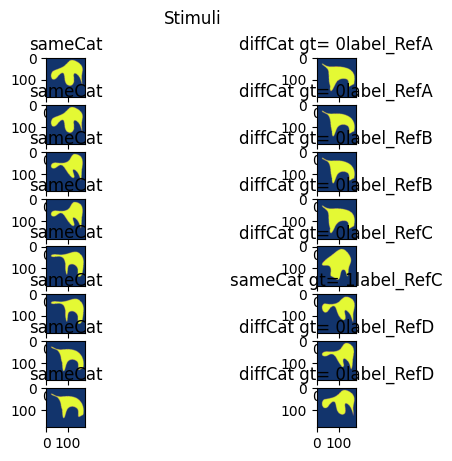

In [249]:
fig, ax = plt.subplots(8, 2)
fig.suptitle("Stimuli")

for idx, number in enumerate(no_randoms):
  pairs = dataset_cond1[number]
  label1 = pairs[0]
  img1 = pairs[2]
  label2 = pairs[1]
  img2 = pairs[3]
  gt = pairs[4]
  ref_shape = pairs[5]

  ax[idx][0].set_title(label1)
  ax[idx][0].imshow(transform.to_pil_image(img1))

  title = label2 + " gt= " + str(gt) +str(ref_shape)
  ax[idx][1].set_title(title)
  ax[idx][1].imshow(transform.to_pil_image(img2))